In [80]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import SolveTriangular
from scipy.linalg import lu

# Esercizio 1

dati = loadmat('Test_I.mat')
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)
A2=dati["A2"] 
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)
A3=dati["A3"] 
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)

print(np.linalg.cond(A1)) # è ben condizionata
print(A1.shape) # di piccole dimensioni e quadrata
#plt.spy(A1) # è densa

# A1 fattorizzazione di Gauss

def gauss(A, b):
    PT, L, U = lu(A)
    P = PT.T
    
    y, flag = SolveTriangular.Lsolve(L, P@b)
    x, flag = SolveTriangular.Usolve(U, y)
    
    return x
    
print(gauss(A1,b1))

120.6148722322323
(10, 10)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [51]:
from scipy.linalg import qr

print(np.linalg.cond(A2)) # mediamete mal condizionata
print(A2.shape) # piccole dimensioni ma non quadrata
print(np.linalg.matrix_rank(A2))  # ha rango massimo


# A2 metodo qrls
def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[:n,:n],h[:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

x, res = qrLS(A2,b2)
print(x)
print(res)

# perturbo A2
A2p = A2.copy()
A2p[0,:] = A2p[0,:] * 1.010
print(A2[0,:])
print()
print(A2p[0,:])

x2, res2 = qrLS(A2p,b2)
print(x2)
print("Perturbazione sui dati del ", (np.linalg.norm(A2p-A2)/np.linalg.norm(A2))*100,'%')
print("Errore del risultato ", (np.linalg.norm(x2-x)/np.linalg.norm(x))*100,'%')

10000.00000000046
(25, 10)
10
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
1.1534779622924033e-28
[  6.23782704   4.86268677   3.21351684   0.24100578  15.07163089
   9.29180924 -11.83033918  -5.03209313 -11.61958462 -15.81234995]

[  6.30020532   4.91131364   3.24565201   0.24341584  15.2223472
   9.38472734 -11.94864257  -5.08241406 -11.73578046 -15.97047345]
[[1.41112853]
 [1.24222612]
 [1.38041873]
 [0.52109225]
 [0.95648104]
 [1.05350894]
 [0.97066981]
 [0.44371956]
 [1.31078387]
 [1.26567105]]
Perturbazione sui dati del  0.28561687824214066 %
Errore del risultato  32.92421943558263 %


103.08686891981725
(225, 225)
True
True
29
Velocità di convergenza del coniugato:  0.8206787908286601


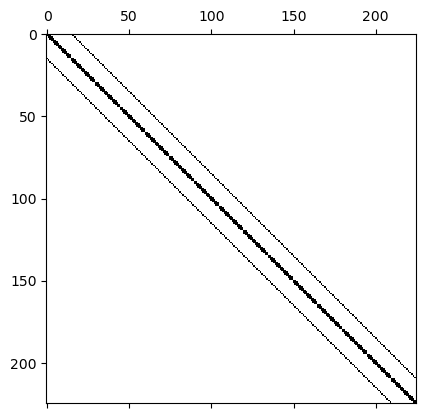

In [32]:
print(np.linalg.cond(A3)) # è ben condizionata
print(A3.shape) # grandi dimensioni e quadrata
plt.spy(A3) # è sparsa
#print(b3) # non ha diagonale strettamente dominante
print(A3.all() == A3.T.all()) # è simmetrica
autovalori = np.linalg.eigvals(A3)
print(autovalori.all() > 0) # è definita positiva

# tra i diversi metodi uso quello del coniugato perchè è tra i più veloci che si
# può usare in base alle proprietà definità prima
# A3 metodo del gradiente coniugato

def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    

   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = (r.T@r)/(Ap.T@p)
        x = x + alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T@r)/(rtr_old)
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r + gamma*p
   
    
    return x,vet_r,vec_sol,it

x0 = np.zeros_like(b3)
itmax = 500
tol = 1e-8

x,vet_r,vec_sol,it = conjugate_gradient(A3,b3,x0,itmax,tol)
print(it)
vel_con = ((np.sqrt(np.linalg.cond(A3))-1)/(np.sqrt(np.linalg.cond(A3))+1))*vet_r[0]
print("Velocità di convergenza del coniugato: ", vel_con)

In [85]:
# Esercizio 2
import sympy as sym
import sympy.utilities.lambdify as lambdify
x = sym.symbols('x')
c = sym.symbols('c')
# Delta = b**2 - 4ac => -b +- sqrt(b**2 - 2c)/2a => -b +- sqrt(b**2 - 2*c)

x1 = -b + sym.sign(b)*sym.sqrt(b**2 - 2*c)
x2 = -b - sym.sign(b)*sym.sqrt(b**2 - 2*c)
pr = c*2

x1d = sym.diff(x1, c)
x2d = sym.diff(x2, c)

i = np.array(np.arange(-5,10),dtype=float)
print(i)
a = 1/2
b = 10**8
vetc = 2**-i

x1_b = x1.subs(b,10**8)
x1d_b = x1d.subs(b,10**8)
x2_b = x2.subs(b,10**8)
x2_b = x2d.subs(b,10**8)

#x1 = (-b + (np.sqrt(b**2 - 4*a*c)))/(2*a)
#x2 =(-b - (np.sqrt(b**2 - 4*a*c)))/(2*a)
#x1_alter = c/(a*x2)

x1_num = lambdify(c,x1_b,np)
x1d_num = lambdify(c,x1d_b,np)

x2_num = lambdify(c,x2_b,np)
x2d_num = lambdify(c,x2d_b,np)

sol1 = x1_num(vetc) 
sol2 = x2_num(vetc)
cond1 = np.abs(x1_num(vetc)*vetc/x1d_num(vetc))

print(cond1)

#all_ris = np.zeros((2,len(i)))
#all_ris[0,:] = x1
#all_ris[1,:] = x2
#print(all_ris)
#print(x1_alter)



[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[1001.35803223  262.26043701   59.60464478   17.88139343    2.98023224
    1.49011612    0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
